<a href="https://colab.research.google.com/github/natasha-kolom/Machine_learning/blob/main/HW_%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B8_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D1%96%D1%97.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Домашнє завдання: Кластеризація в Аналізі Персоналій Клієнтів

#### Контекст
В цьому ДЗ ми скористаємось алгоритмами кластеризації для задачі аналізу портретів клієнтів (Customer Personality Analysis).

Customer Personality Analysis - це аналіз різних сегментів клієнтів компанії. Цей аналіз дозволяє бізнесу краще розуміти своїх клієнтів і полегшує процес адаптації продуктів під конкретні потреби, поведінку та інтереси різних типів клієнтів.

Аналіз портретів клієнтів допомагає бізнесу змінювати свій продукт на основі цільової аудиторії, розділеної на різні сегменти. Наприклад, замість того, щоб витрачати гроші на маркетинг нового продукту для всіх клієнтів у базі даних компанії, бізнес може проаналізувати, який сегмент клієнтів найімовірніше придбає продукт, і потім зосередити маркетингові зусилля лише на цьому сегменті.

#### Завдання
На основі наданих даних в файлі `marketing_campaign.csv` потрібно виконати кластеризацію, щоб виявити сегменти клієнтів.

#### Вхідні дані
Вам надано набір даних з такими атрибутами:

**Характеристики користувачів:**
- `ID`: Унікальний ідентифікатор клієнта
- `Year_Birth`: Рік народження клієнта
- `Education`: Рівень освіти клієнта
- `Marital_Status`: Сімейний стан клієнта
- `Income`: Річний дохід домогосподарства клієнта
- `Kidhome`: Кількість дітей у домогосподарстві клієнта
- `Teenhome`: Кількість підлітків у домогосподарстві клієнта
- `Dt_Customer`: Дата реєстрації клієнта у компанії
- `Recency`: Кількість днів з моменту останньої покупки клієнта
- `Complain`: 1, якщо клієнт скаржився за останні 2 роки, 0 - якщо ні

**Продукти:**
- `MntWines`: Сума, витрачена на вино за останні 2 роки
- `MntFruits`: Сума, витрачена на фрукти за останні 2 роки
- `MntMeatProducts`: Сума, витрачена на м'ясні продукти за останні 2 роки
- `MntFishProducts`: Сума, витрачена на рибні продукти за останні 2 роки
- `MntSweetProducts`: Сума, витрачена на солодощі за останні 2 роки
- `MntGoldProds`: Сума, витрачена на золото за останні 2 роки

**Акції:**
- `NumDealsPurchases`: Кількість покупок, зроблених з використанням знижок
- `AcceptedCmp1`: 1, якщо клієнт прийняв пропозицію у першій кампанії, 0 - якщо ні
- `AcceptedCmp2`: 1, якщо клієнт прийняв пропозицію у другій кампанії, 0 - якщо ні
- `AcceptedCmp3`: 1, якщо клієнт прийняв пропозицію у третій кампанії, 0 - якщо ні
- `AcceptedCmp4`: 1, якщо клієнт прийняв пропозицію у четвертій кампанії, 0 - якщо ні
- `AcceptedCmp5`: 1, якщо клієнт прийняв пропозицію у п'ятій кампанії, 0 - якщо ні
- `Response`: 1, якщо клієнт прийняв пропозицію в останній кампанії, 0 - якщо ні

**Взаємодія з компанією:**
- `NumWebPurchases`: Кількість покупок, зроблених через вебсайт компанії
- `NumCatalogPurchases`: Кількість покупок, зроблених за каталогом
- `NumStorePurchases`: Кількість покупок, зроблених безпосередньо у магазинах
- `NumWebVisitsMonth`: Кількість відвідувань вебсайту компанії за останній місяць


**Завдання 1**. Завантажте дані з `marketing_campaign.csv` в Pandas dataframe і виведіть основну інформацію про дані: скільки всього рядків і колонок, які типи даних мають колонки, скільки пропущених значень.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics

In [4]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
data.isna().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


**Завдання 2.** Заповніть пропущені значення з врахуванням того завдання (кластеризація), яке ми виконуємо. Поясніть свій вибір заповнення пропущених значень.

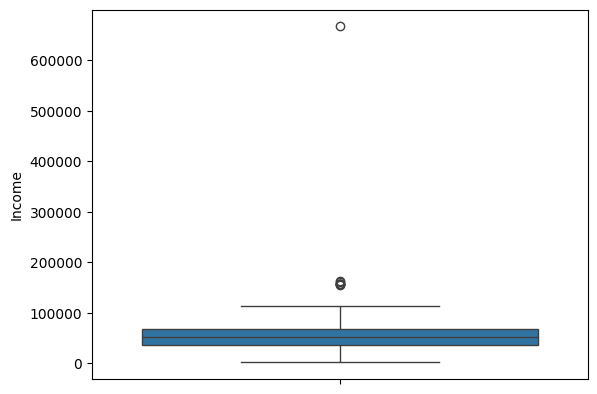

In [25]:
import seaborn as sns
from scipy.stats import probplot
sns.boxplot(data.Income)
plt.show()

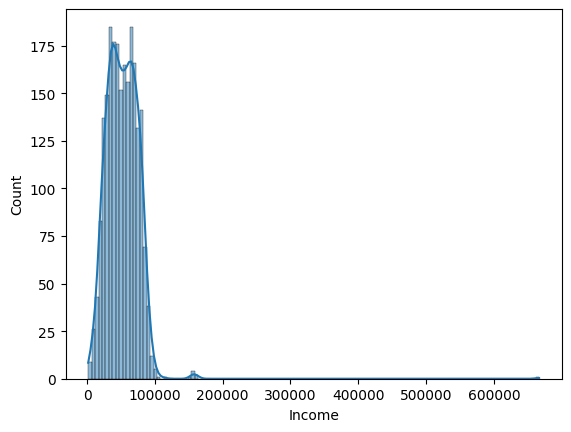

In [24]:
# Гістограма
sns.histplot(data['Income'], kde=True)
plt.show()

In [18]:
data.Income.quantile(q = [0.25,0.5,0.75,1])

,Income
0.25,35303.0
0.50,51381.5
0.75,68522.0
1.00,666666.0


In [19]:
data.Income.mode()[0]

7500.0

In [20]:
data.Income.mean()

52247.25135379061

In [21]:
data.Income.median()

51381.5

In [27]:
data.Income.fillna(data.Income.mean(), inplace=True)

**Спостереження**
Так як медіана та середнє близькі, ми можемо заповнити дані одним з цих значень. Для заповлення оберемо медіану, так як в наших даних є викиди, а вона більш стійка до викидів.

**Завдання 3.** У нас є декілька колонок з категоріальними значеннями та одна колонка з датою. Як би ви обробили ці колонки для того, аби передати їх в алгоритм кластеризації?

Реалізуйте обробку категоріальних колонок і колонки з датою та перетворіть їх на ознаки, корисні для кластеризації з вашого погляду.

In [33]:
import numpy as np
np.sort(data.Year_Birth.unique())

array([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996])

In [34]:
data['Age'] = 2024 - data['Year_Birth']

In [36]:
np.sort(data.Age.unique())

array([ 28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  83,  84, 124, 125, 131])

In [46]:
#Education, Marital_Status
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
enc.fit(data[['Education']])
enc.categories_

[array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)]

In [47]:
one_hot = enc.transform(data[['Education']]).toarray()

In [48]:
enc.categories_[0]

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [50]:
data[enc.categories_[0]] = one_hot
one_hot_train = enc.transform(data[['Education']]).toarray()
data[enc.categories_[0]] = one_hot_train

In [51]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,2n Cycle,Basic,Graduation,Master,PhD
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,3,11,1,67,0.0,0.0,1.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,3,11,0,70,0.0,0.0,1.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,3,11,0,59,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,3,11,0,40,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,3,11,0,43,0.0,0.0,0.0,0.0,1.0


In [52]:
enc = preprocessing.OneHotEncoder()
enc.fit(data[['Marital_Status']])
#enc.categories_
one_hot = enc.transform(data[['Marital_Status']]).toarray()
data[enc.categories_[0]] = one_hot
one_hot_train = enc.transform(data[['Marital_Status']]).toarray()
data[enc.categories_[0]] = one_hot_train

In [53]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [62]:
data['Total_Number_of_Purchases'] = data['NumWebPurchases']+data['NumCatalogPurchases']+data['NumStorePurchases']
data['Total_Amount'] = data['MntWines']+data['MntFruits']+data['MntMeatProducts']+data['MntFishProducts']+data['MntSweetProducts']+data['MntGoldProds']

In [ ]:
X = data.drop(['ID','Dt_Customer','Education','Marital_Status','Total_Number_of_Purchases','Total_Amount'], axis=1)

**Спостереження**
Я додала колонку Вік, та закодувала колонки Education та Marital_Status

**Завдання 4**.
1. Запишіть в змінну X ті дані, які будете кластеризувати.
2. Побудуйте кластеризацію з KMeans на 3 кластери.
3. Обчисліть метрику силуету для цієї кластеризації.

In [99]:
X = data.drop(['ID','Dt_Customer','Education','Marital_Status'], axis=1)

In [64]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(X)

labels = kmeans.predict(X)
print(labels)

[2 2 0 ... 2 0 2]


In [58]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [65]:
silhouette_avg = silhouette_score(X, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.5379113192041954


**Завдання 5.** Візуалізуйте знайдені кластери разом з наявними даними та проаналізуйте кластери. У нас ознак більше, ніж 2 або 3, тож, тут треба подумати, які саме ознаки варто використати для візуалізації аби вони були інформативними. Рекомендую точно звернути увагу на харакетиристики про дохід користувачів і те, як вони взаємодять з магазинок (кількість покупок і тд).

Для візуалізації зручно може бути використати `plotly.express.scatter_3d` для 3D графіку розсіювання, але тут можна скористатись будь-яким зрозумілим і зручним для вас методом візуалізації. Опишіть свої спостереження, чи кластери мають сенс?

In [66]:
import plotly.express as px

In [70]:
data['cluster'] = labels

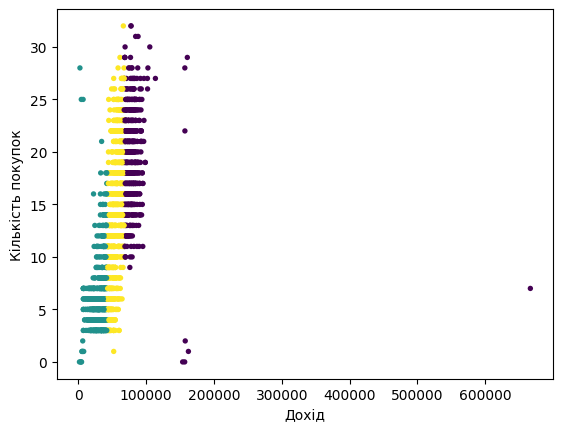

In [77]:
plt.scatter(
    data['Income'], data['Total_Number_of_Purchases'], marker=".", s=60, lw=0, c=data['cluster'], edgecolor="k"
)
plt.xlabel('Дохід')
plt.ylabel('Кількість покупок');

In [71]:
fig = px.scatter_3d(data, x='Income', y='Total_Number_of_Purchases', z='Total_Amount',
                    color='cluster', title="Візуалізація кластерів користувачів",
                    labels={'Income': 'Дохід', 'Total_Number_of_Purchases': 'Кількість покупок', 'Total_Amount': 'Загальні витрати'},
                    size_max=18, opacity=0.7)

fig.show()

**Спостереження**
Відслідковується залежність, що чим вище дохід тим більша кількість покупок, але все таки кластерізація зроблена не ідеально, це видно і з графіків і з показника silhouette_score

**Завдання 6**. Масштабуйте дані і побудуйте знову кластеризацію KMeans на 3 кластери і обчисліть метрику силуету. Опишіть порівняння з експериментом без масштабування значень.

In [78]:
from sklearn.preprocessing import StandardScaler

In [84]:
numeric_cols = X.select_dtypes(include='number').columns
scaler = StandardScaler()
scaler.fit(X[numeric_cols])
scaled_inputs = scaler.transform(X[numeric_cols])

In [87]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(scaled_inputs)

labels = kmeans.predict(scaled_inputs)
print(labels)

[2 1 0 ... 0 0 1]


In [88]:
silhouette_avg = silhouette_score(scaled_inputs, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.12517465490056162


**Спостереження**
Метрика силуету значно погіршилась

**Завдання 7.** З візуалізацій на попередньому кроці ви могли побачити якісь викиди в даних. Опрацюйте викиди (можна видалити ці рядки або придумати інший спосіб).

In [90]:
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
# Видалення викидів
df_no_outliers = X[~((X < (Q1 - 1.5 * IQR)) | (X > (Q3 + 1.5 * IQR))).any(axis=1)]

In [103]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df_no_outliers)
labels = kmeans.predict(df_no_outliers)
silhouette_avg = silhouette_score(df_no_outliers, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.5551590049895601


**Завдання 8.** Виконайте Elbow method для пошуку оптимальної кількості кластерів та натренуйте KMeans з тою кількістю кластерів, яку Elbow method показав як оптимальну. Обчисліть метрику силуету. Візуалізуйте кластери. З яким набором даних (масштабованим чи ні) тут працювати - ваш вибір, можна зробити експеримент з обома.

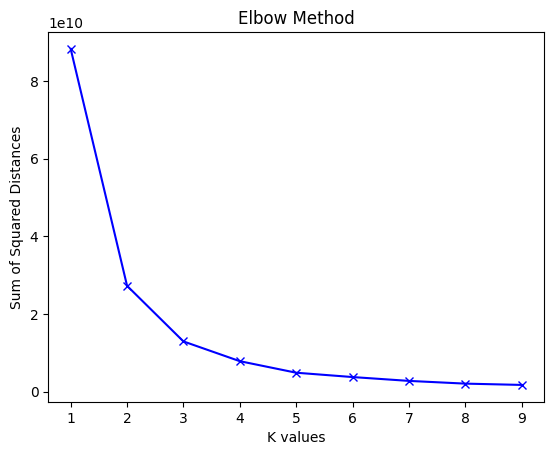

In [104]:
K = range(1,10)
sum_of_squared_distances = []

for k in K:
    model = KMeans(n_clusters=k, n_init='auto').fit(df_no_outliers)
    sum_of_squared_distances.append(model.inertia_)

plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()

In [106]:
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(df_no_outliers)
labels = kmeans.predict(df_no_outliers)
silhouette_avg = silhouette_score(df_no_outliers, labels)
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.5551590049895601


**Завдання 9.** Використовуючи методи `scipy` `dendrogram, linkage, fcluster`
1. Побудуйте ієрархічну агломеративну кластеризацію з `single linkage` на даних невідмасштабованих, але з прибраним викидом.
2. Візуалізуйте дендрограму. При візуалізації обовʼязково задайте параметр `truncate_mode='lastp'` - це обріже дендрограму, без цього вона буде завелика, бо у нас тут даних суттєво більше, ніж в лекції.
3. Проаналізуйте дендрограму та побудуйте варіанти плоских кластеризацій з `fcluster` на 2 і 3 кластери. Візуалізуйте результати кожної з цих кластеризацій та зробіть висновок. Чи вважаєте ви якусь з цих кластеризацій вдалою? Що спостерігаєте з цих кластеризацій?
4. Порахуйте мерику силуету для цього методу кластеризації.

In [107]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

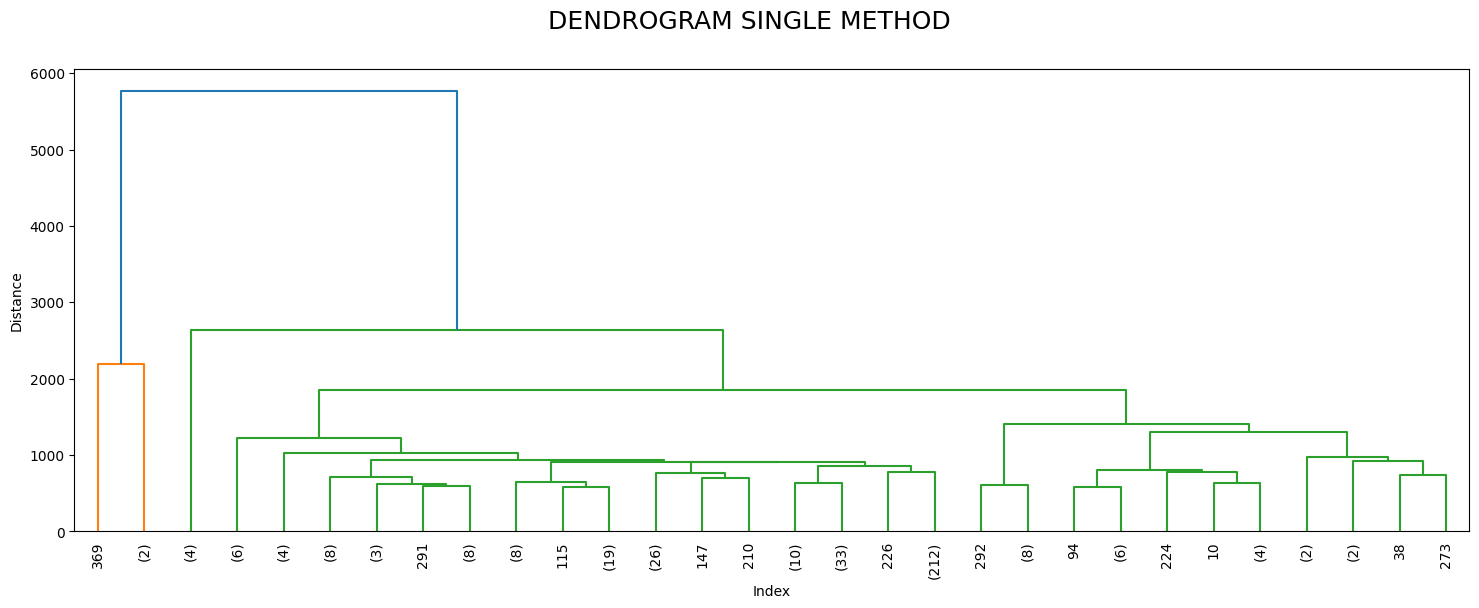

In [109]:
dist_sin = linkage(df_no_outliers, method="single")
plt.figure(figsize=(18,6))
dendrogram(dist_sin, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM SINGLE METHOD",fontsize=18)
plt.show()

In [112]:
df_no_outliers['2_clust'] = fcluster(dist_sin, 2, criterion='maxclust')
df_no_outliers['3_clust'] = fcluster(dist_sin, 3, criterion='maxclust')

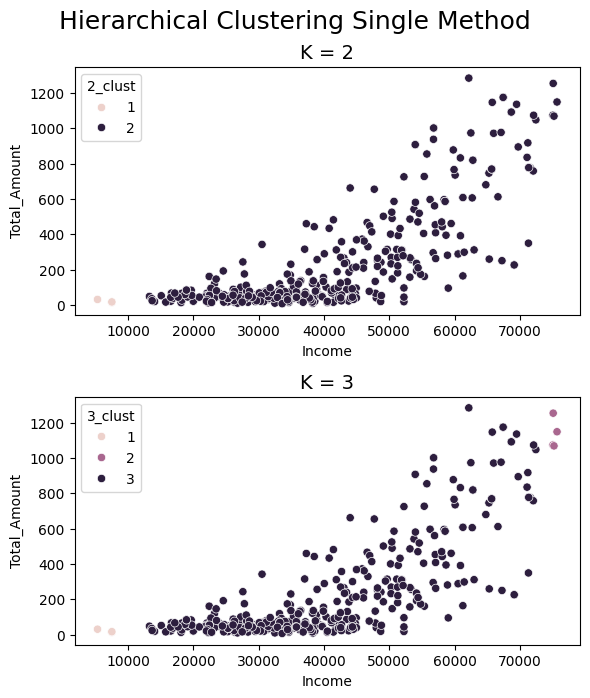

In [115]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering Single Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="Total_Amount", data=df_no_outliers, hue="2_clust")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income",y="Total_Amount", data=df_no_outliers, hue="3_clust")

plt.tight_layout();

In [116]:
silhouette_avg = silhouette_score(df_no_outliers, df_no_outliers['2_clust'])
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.39674519749160714


In [117]:
silhouette_avg = silhouette_score(df_no_outliers, df_no_outliers['3_clust'])
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.1800504009225848


**Спостереження**
Розподілення за допомогою fcluster на 2 кластери дало кращий результат, ніж на 3. Але все-одно гірший результат, ніж KMean. Судячи з візуалізацій при к=3 2 клас визначився досить дивно. Загалом не сама вдала кластерізація, я б зупинилась на KMean з 3 кластерами та датафреймом без аутлаєрів.

**Завдання 10.**
1. Використайте метод кластеризації, який ми не використовували в попередніх завданнях цього ДЗ (може бути ієрархічна кластеризація з іншим способом звʼязності або інші методи sklearn).
2. Порахуйте мер=трику силуету і візуалізуйте результат кластеризації. Зробіть висновок про те, чи могла б ця кластеризація бути корисною?

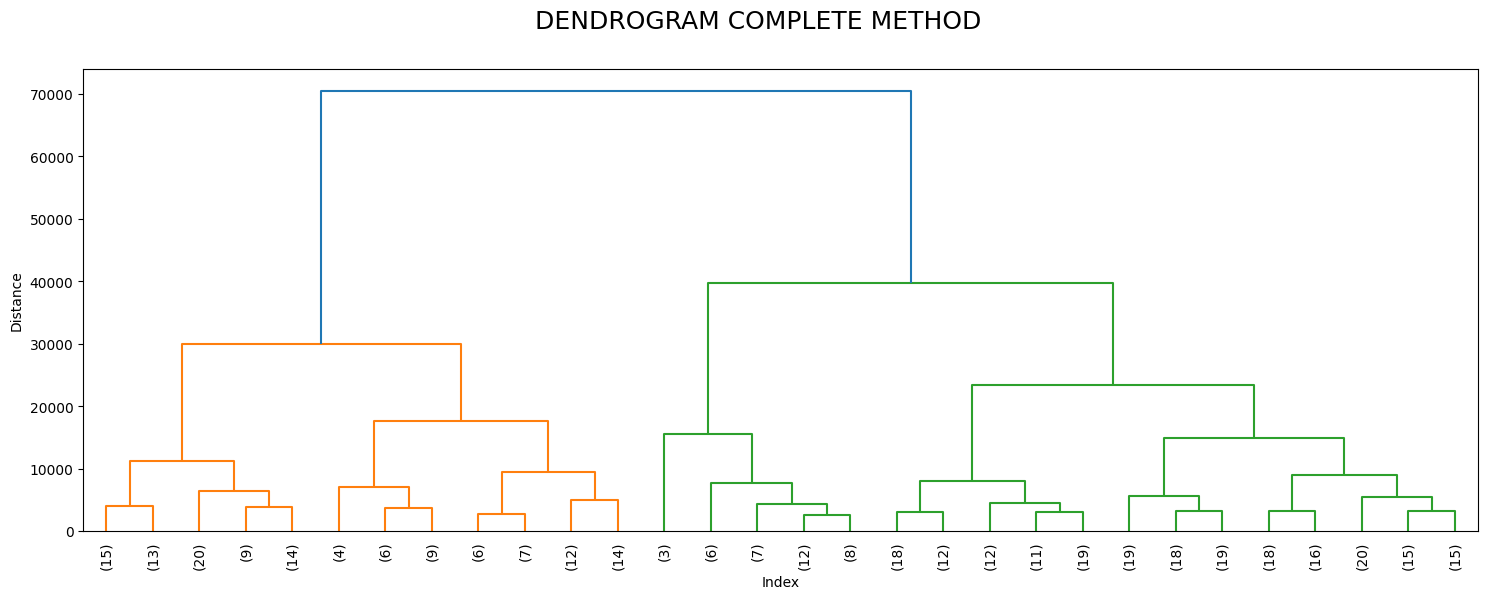

In [129]:
dist_comp = linkage(df_no_outliers, method="complete")

plt.figure(figsize=(18,6))
dendrogram(dist_comp, leaf_rotation=90, truncate_mode='lastp')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("DENDROGRAM COMPLETE METHOD",fontsize=18)
plt.show()

In [130]:
df_no_outliers['2_clust_CM']=fcluster(dist_comp, 2, criterion='maxclust')
df_no_outliers['3_clust_CM']=fcluster(dist_comp, 3, criterion='maxclust')
df_no_outliers.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Single,Together,Widow,YOLO,Total_Number_of_Purchases,Total_Amount,2_clust,3_clust,2_clust_CM,3_clust_CM
2,1965,71613.000000,0,0,26,426,49,127,111,21,...,0.0,1.0,0.0,0.0,20,776,2,3,1,1
3,1984,26646.000000,1,0,26,11,4,20,10,3,...,0.0,1.0,0.0,0.0,6,53,2,3,2,3
10,1983,52247.251354,1,0,11,5,5,6,0,2,...,0.0,0.0,0.0,0.0,3,19,2,3,1,1
14,1987,17323.000000,0,0,38,3,14,17,6,1,...,0.0,0.0,0.0,0.0,4,46,2,3,2,2
16,1980,41850.000000,1,1,51,53,5,19,2,13,...,0.0,0.0,0.0,0.0,6,96,2,3,2,3


In [131]:
silhouette_avg = silhouette_score(df_no_outliers, df_no_outliers['2_clust_CM'])
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.5892109843896973


In [132]:
silhouette_avg = silhouette_score(df_no_outliers, df_no_outliers['3_clust_CM'])
print(
        "Середнє значення silhouette_score становить:",
        silhouette_avg,
    )

Середнє значення silhouette_score становить: 0.46498427481350924


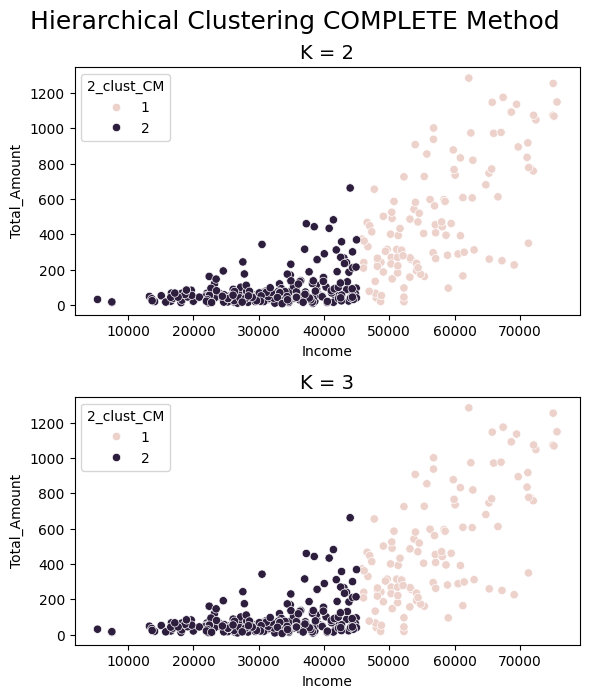

In [134]:
plt.figure(figsize=(6,10))

plt.suptitle("Hierarchical Clustering COMPLETE Method",fontsize=18)

plt.subplot(3,1,1)
plt.title("K = 2",fontsize=14)
sns.scatterplot(x="Income",y="Total_Amount", data=df_no_outliers, hue="2_clust_CM")

plt.subplot(3,1,2)
plt.title("K = 3",fontsize=14)
sns.scatterplot(x="Income",y="Total_Amount", data=df_no_outliers, hue="2_clust_CM")

plt.tight_layout();

**Спостереження**
Цей метод дав найкращий результат при розбитті на 2 кластери, як і видно з дердрограми найкраще розбивати на 2 кластери, але я вирішила протестувати і розбиття на 3 кластери. Отже і по дендрограмі і по результатам роботи Ієрархічного розбиття, найркащий результат, якого нам вдалося досягти при к=2 - це силует скор  0.589